In [1]:
import pandas as pd


train = pd.read_csv("mammography/data/raw/train.csv")
dicom_meta = pd.read_csv("mammography/dicom_metadata.csv")
x = train.merge(dicom_meta, on="image_id", validate="1:1")
x = x.loc[:, x.nunique().gt(1)]  # filter columns with no variance

In [2]:
train.head().T

,0,1,2,3,4
site_id,2,2,2,2,2
patient_id,10006,10006,10006,10006,10011
image_id,462822612,1459541791,1864590858,1874946579,220375232
laterality,L,L,R,R,L
view,CC,MLO,MLO,CC,CC
age,61.0,61.0,61.0,61.0,55.0
cancer,0,0,0,0,0
biopsy,0,0,0,0,0
invasive,0,0,0,0,0
BIRADS,NaN,NaN,NaN,NaN,0.0


In [3]:
train["cancer"].mean()

0.0211676964135561

In [11]:
from mammography.src.train import DataModule, Model
import torch


torch.tensor(Model.get_bias(train["cancer"])).sigmoid()


tensor(0.0212, dtype=torch.float64)

In [8]:
train["cancer"].value_counts(normalize=True)

0    0.978832
1    0.021168
Name: cancer, dtype: float64

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from mammography.src.train import dicom2numpy, crop

filepaths = glob("mammography/data/uint8_crops/*.npy")
print(len(filepaths))

/Users/Jake/Projects/kaggle/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0


In [3]:
from mammography.src.train import dicom2numpy
import cv2


def read_dcm(image_id):
    image_id = str(image_id)
    for filepath in glob("mammography/data/raw/*_images/*/*.dcm"):
        if image_id in filepath:
            arr = dicom2numpy(filepath)
            return arr


def read_png(image_id):
    return cv2.imread(f"mammography/data/uint8_crops/png/{image_id}.png", cv2.IMREAD_GRAYSCALE)

q1 = x.query("PhotometricInterpretation == 'MONOCHROME2' and PixelIntensityRelationshipSign == 1.0")
q2 = x.query("PhotometricInterpretation == 'MONOCHROME2' and PixelIntensityRelationshipSign == -1.0")
q3 = x.query("PhotometricInterpretation == 'MONOCHROME1'")

In [4]:
x.groupby(["PhotometricInterpretation", "PixelIntensityRelationshipSign"]).size()

PhotometricInterpretation  PixelIntensityRelationshipSign
MONOCHROME1                 1.0                               9337
MONOCHROME2                -1.0                              37143
                            1.0                               8221
dtype: int64

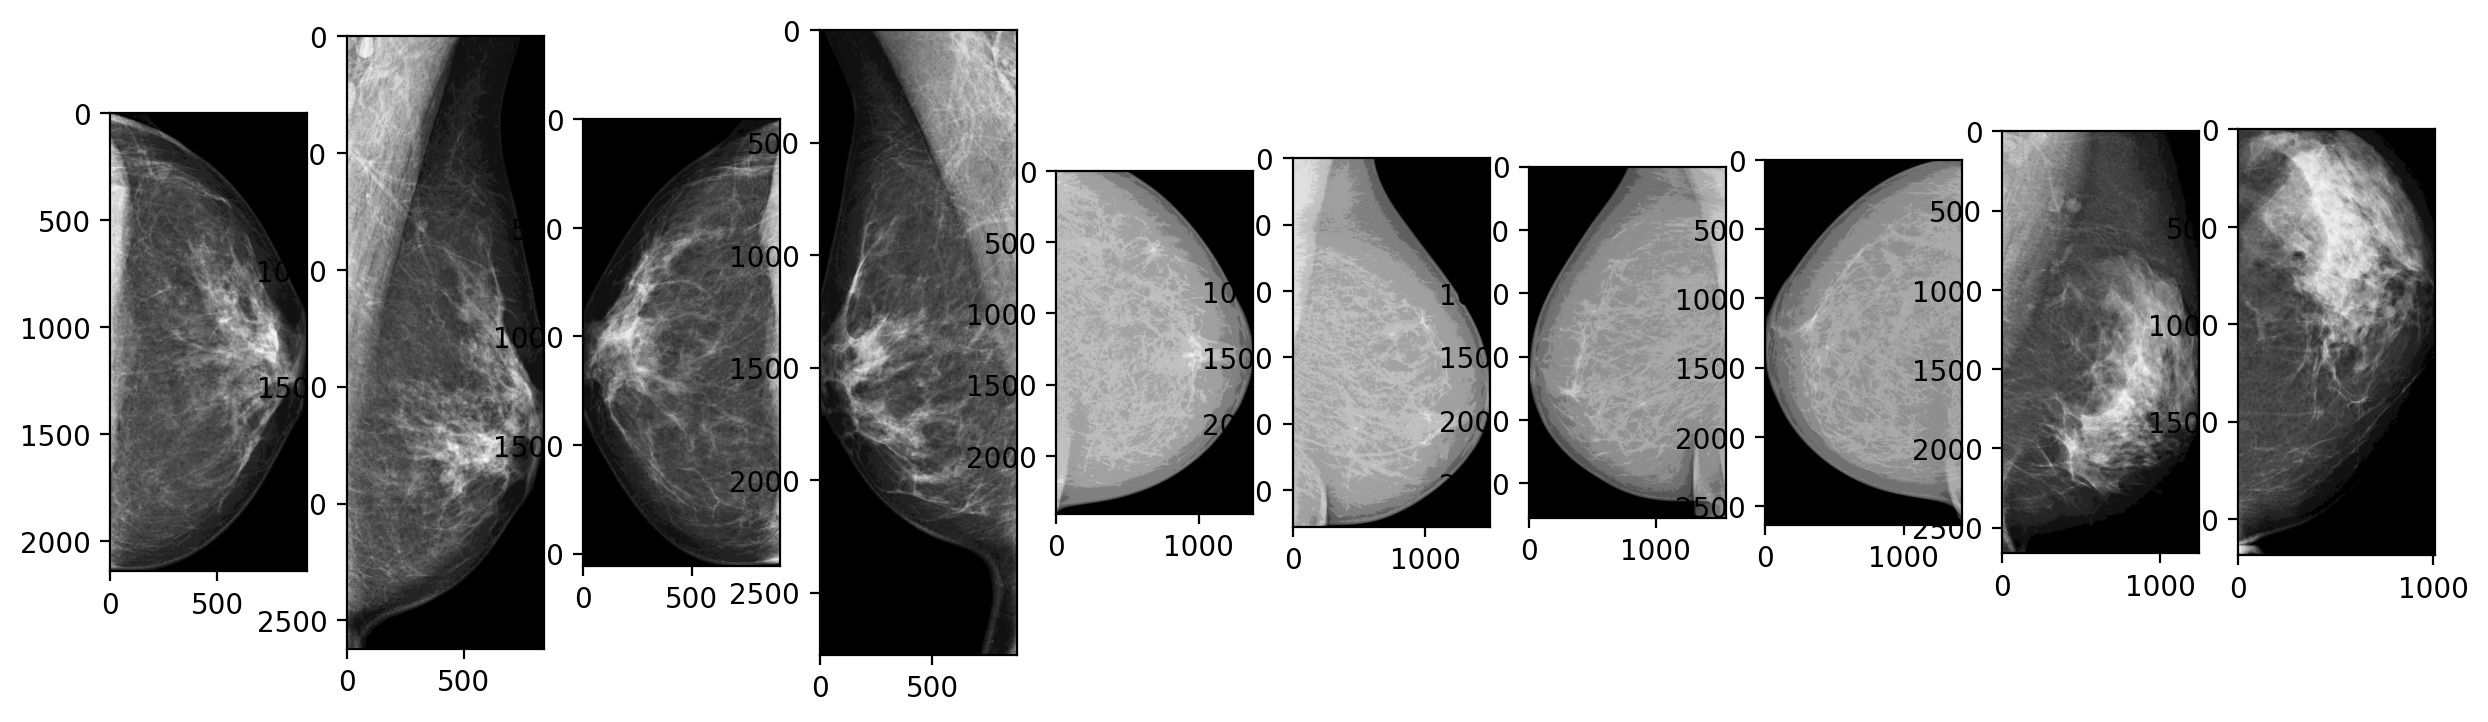

In [5]:
f, ax = plt.subplots(nrows=1, ncols=10, figsize=(15, 15))
for i, a in enumerate(ax):
    # arr = read_dcm(q1.iloc[i]["image_id"])
    # arr = crop(arr)
    arr = read_png(q1.iloc[i]["image_id"])
    a.imshow(arr, cmap="gray")

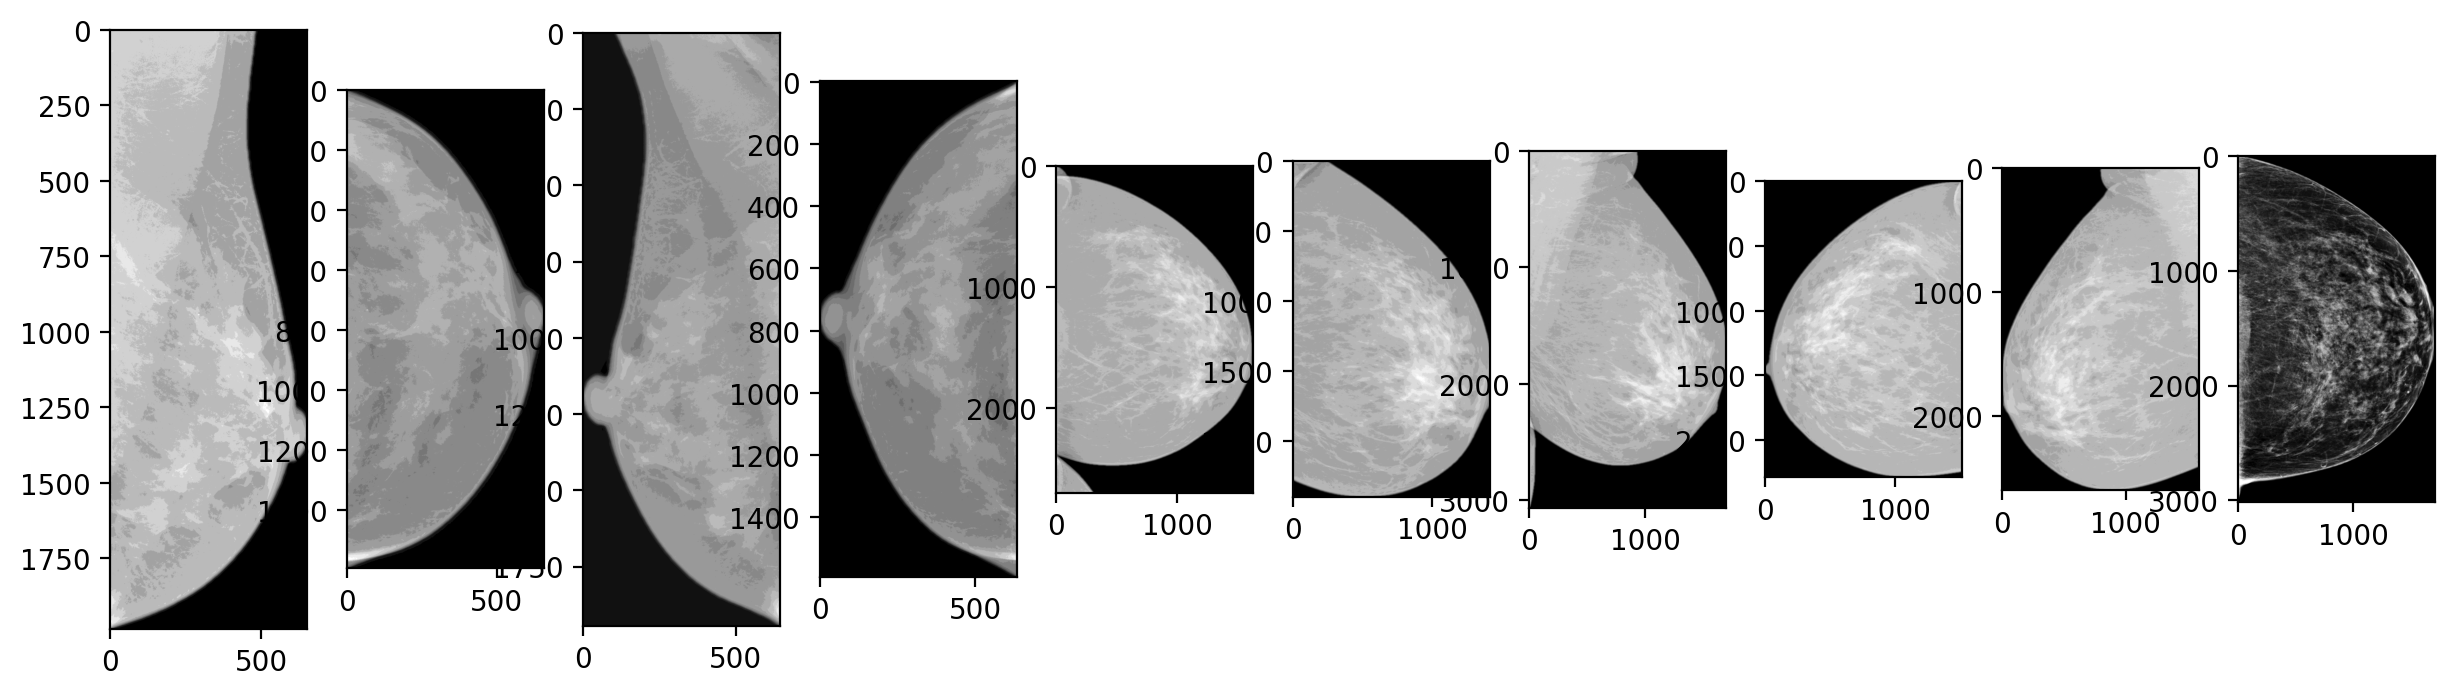

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=10, figsize=(15, 15))
for i, a in enumerate(ax):
    arr = read_dcm(q2.iloc[i]["image_id"])
    arr = crop(arr)
    a.imshow(arr, cmap="gray")

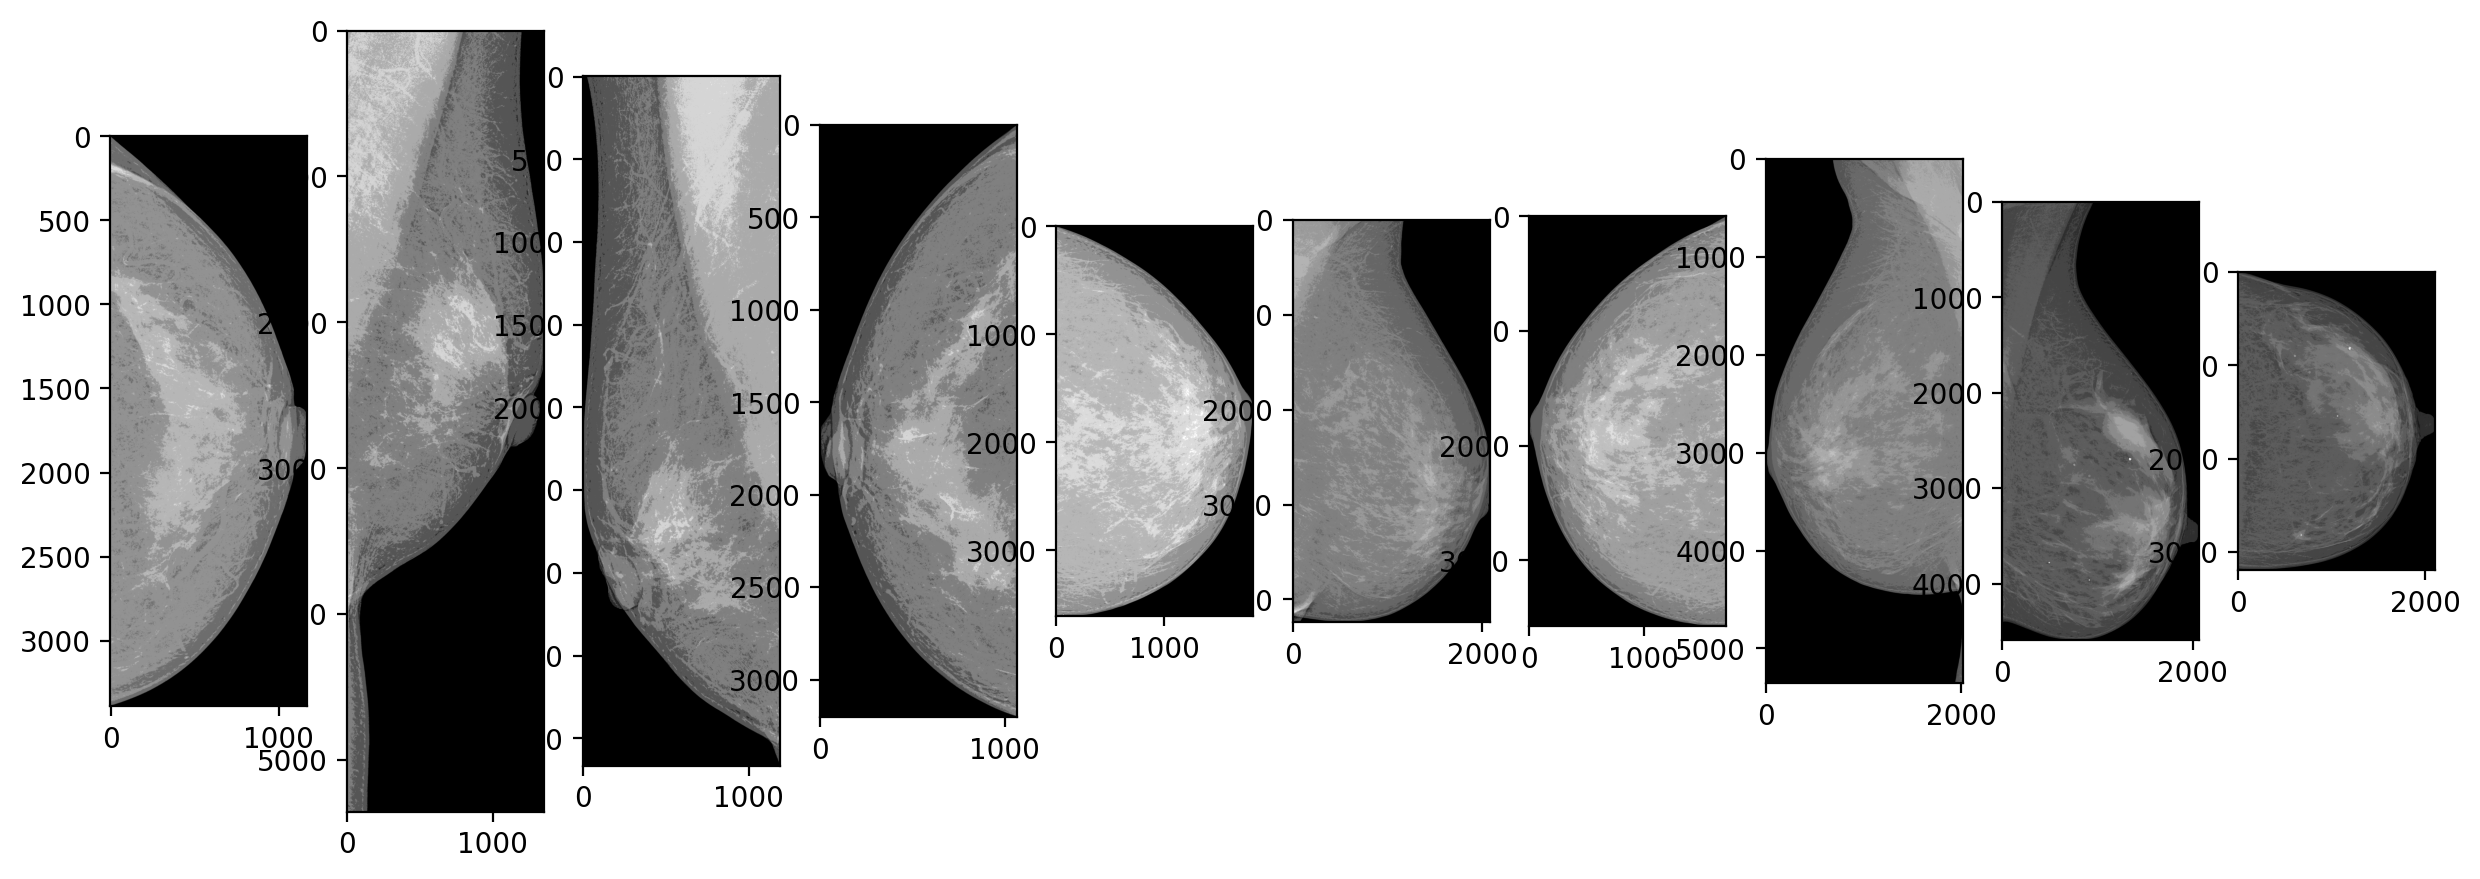

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=10, figsize=(15, 15))
for i, a in enumerate(ax):
    arr = read_dcm(q3.iloc[i]["image_id"])
    arr = crop(arr)
    a.imshow(arr, cmap="gray")

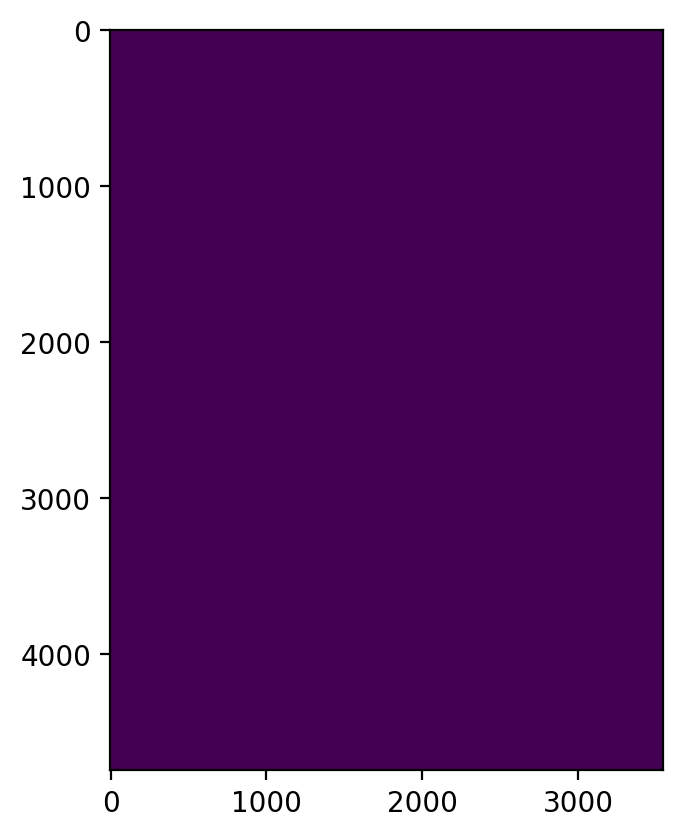

In [ ]:
# BAD DATA
# https://www.kaggle.com/competitions/rsna-breast-cancer-detection/discussion/369341#2054729
arr = read_dcm(1942326353)
plt.imshow(arr);

In [24]:
import kaggle

In [ ]:
kaggle.api.dataset_create_new

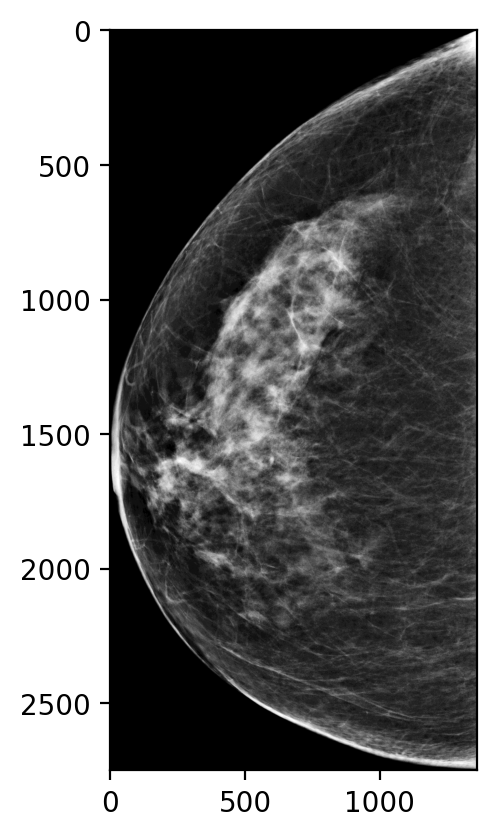

In [22]:
import cv2
import matplotlib.pyplot as plt

arr = cv2.imread("/Users/Jake/Projects/kaggle/mammography/data/uint8_crops/53439839.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(arr, cmap="gray");

In [23]:
arr

array([[ 0,  0,  0, ...,  1,  6,  8],
       [ 0,  0,  0, ..., 10, 13, 13],
       [ 0,  0,  0, ..., 14, 15, 15],
       ...,
       [ 0,  0,  0, ...,  4,  4,  4],
       [ 0,  0,  0, ...,  3,  3,  3],
       [ 0,  0,  0, ...,  2,  2,  3]], dtype=uint8)